A = 1029.93266063 +/- 0.815410472267
T0 = 4.17322050819 +/- 0.0066230670962


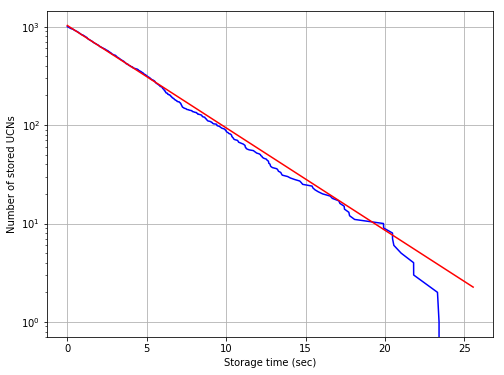

In [39]:
# aliveOutputFile = "../build/alive.out"
# aliveOutputFile = "../models/sun2/storage_simple/data/alive.out"  # simple storage, n_runs = 1000
aliveOutputFile = "../models/sun2/storage_extra/data/alive.out"   # storage with extra DLC cap

n_runs = 1000

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def file_length(file_name):
    with open(file_name) as f:
        i = -1
        for i, l in enumerate(f):
            pass
        return i+1
    
def storage_model(t, A, T0):
    return A * np.exp(-t/T0)

# Read in alive time output file
n_lines = file_length(aliveOutputFile)
data = np.zeros((n_lines, 7))
with open(aliveOutputFile, 'r') as f:
    for i, line in enumerate(f):
        line_list = line.split(" ")
        alive_time   = float(line_list[0][:-1])
        position_vector_1 = (line_list[1][1:-2]).split(",")
        position_vector_2 = (line_list[2][1:-2]).split(",")
        x1, y1, z1  = np.array(position_vector_1).astype("float")  
        x2, y2, z2  = np.array(position_vector_2).astype("float")  
        data[i,0] = alive_time
        data[i,1] = x1
        data[i,2] = y1
        data[i,3] = z1
        data[i,4] = x2
        data[i,5] = y2
        data[i,6] = z2

alive_times = data[:,0]
death_position = data[:,4:]


t = np.sort(alive_times)
n_UCNs = n_runs - np.arange(1,n_runs+1)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(storage_model, t, n_UCNs, bounds=(0.0, [2.0*n_runs, 1000.0,]))


A = popt[0]
dA = np.sqrt(pcov[0,0])
T0 = popt[1]
dT0 = np.sqrt(pcov[1,1])

print "A = " + str(A) + " +/- " + str(dA)
print "T0 = " + str(T0) + " +/- " + str(dT0)

plt.rcParams["figure.figsize"] = 8, 6

plt.semilogy(t, n_UCNs, 'b')
plt.semilogy(t, storage_model(t, A, T0), 'r')
plt.xlabel("Storage time (sec)")
plt.ylabel("Number of stored UCNs")
plt.grid()
plt.show()
